### Assignment 2 

Name : Felix Prima <br>
NIM : 2301899622



## #0 Prerequisites

#### #0.1 Import the libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

#### #0.2 Important Functions 

In [3]:
# Untuk mempermudah penampilan gambar
def show_image(title, img) : 
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def plot_spectrum (f) :
    plt.imshow(np.log1p(np.abs(f)), cmap='gray')

#### #0.3 Read and show the image

In [4]:
img = cv2.imread("img.jpg", 0) # Buka gambar sebagai gambar gray scale
show_image("Original Image", img) # Tampilkan gambar

## (*) Frequency Domain Filter

1. Transformasikan gambar $f(x,y)$ ke frequency domain dengan menggunakan transformasi Fourier
$$F(u,v) = \mathcal{F}(f(x,y))$$
2. Lakukan perkalian dengan filter $H(u,v)$
$$G(u,v) = F(u,v) \cdot H(u,v) $$
3. Lakukan inverse Fourier Transform
$$g(x,y) = \mathcal{F}^{-1}\{G(u,v)\}$$


Keterangan <br>
$f(x,y)$ = Gambar pada domain spatial<br>
$F(u,v)$ = Gambar dalam frequency domain<br>
$G(u,v)$ = Gambar yang sudah terfilter dalam frequency domain<br>
$g(x,y)$ = Gambar yang sudah terfilter dalam domain spatial<br>

$$
H(u,v) = \{\begin{array}{ll}
      1 & D(u,v) \leq D_0 \\
      0 & D(u,v) > D_0 \\
\end{array}
$$

Dengan
$D(u,v) = \sqrt{(u-\frac{M}{2})^2 + (v-\frac{N}{2})^2}$

$M,N$ adalah size gambar (baris, kolom)\
$D_0$ adalah koefisien frekuensi

## No. 1 -  Low Pass Filtering using FFT

### Step 1 - Transform gambar ke Frequency Domain

Text(0.5, 1.0, 'Gambar pada domain frekuensi')

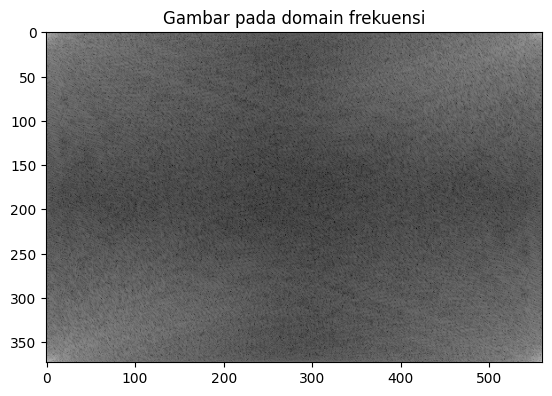

In [5]:
F = np.fft.fft2(img) #  Melakukan transformasi dari domain spatial ke domain frekuensi menggunakan transformasi Fourier dengan menggunakan fungsi pada numpy

plot_spectrum(F) # Plot spectrum gambar pada domain frekuensi. 
plt.title("Gambar pada domain frekuensi")

# Biasanya, low frequency terletak pada corner gambar dan high frequency terletak pada tengah gambar.

# Biasanya, akan dilakukan shifting supaya low frequency berkumpul di tengah.

#### Step 1.1 Shift the low frequency into center by using FFT Shift

Text(0.5, 1.0, 'Gambar pada domain frekuensi (Shifted)')

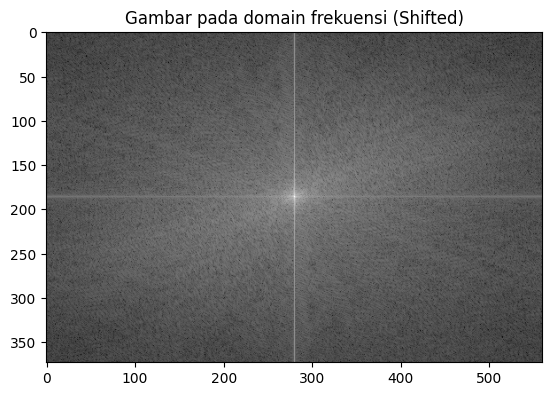

In [6]:
F_shift = np.fft.fftshift(F) # Melakukan shifting pada gammbar agar low frequency berkumpul ditengah dengan menggunakan fungsi pada numpy
plot_spectrum(F_shift) # Plot spectrum gambar
plt.title("Gambar pada domain frekuensi (Shifted)")

### Step 2 - Memasang Filter H dengan mengalikan F dengan H

#### Step 2.1 - Membuat Filter H

Filter H adalah

$$
H(u,v) = \{\begin{array}{ll}
      1 & D(u,v) \leq D_0 \\
      0 & D(u,v) > D_0 \\
\end{array} ... (1)
$$ 

Dengan
$D(u,v) = \sqrt{(u-\frac{M}{2})^2 + (v-\frac{N}{2})^2}$


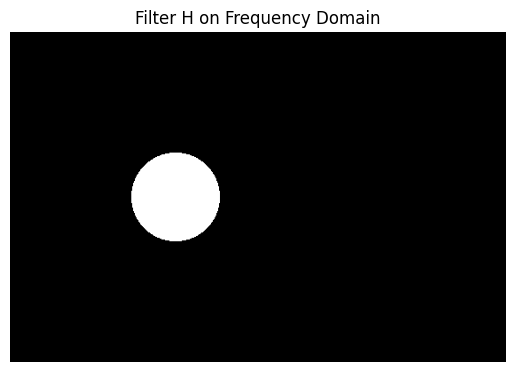

In [7]:
M, N = img.shape # Mengambil jumlah pixel height dan jumlah pixel width pada gambar 

H = np.zeros((M,N), dtype = np.float32) # Membuat array kosong untuk menampung filter H

D_0 = 50 # Konstanta untuk D0 di mana D0 adalah koefisien frekuensi

# Mengisi array filter H dengan ketentuan pada persamaan (1) (Low Pass Filtering)
for u in range(M) :
    for v in range(N) :
        D = np.sqrt((u - M / 2) ** 2 + (v - M/2) ** 2)
        if D <= D_0 : H[u][v] = 1
        else : H[u][v] = 0
        
# Plot filter H (low pass) pada frequency domain. 
plt.imshow(H, cmap = 'gray')
plt.title("Filter H on Frequency Domain")
plt.axis('off')
plt.show()
# Warna pada middle merepresentasikan value 1
# Warna sisanya merepresentasikan value 0

#### Step 2.2 - Mengalikan Gambar yang gambar $F$ yang sudah dilakukan shifting dengan filter $H$ 

$$G_{shift}(u,v) = F_{shift}(u,v) \cdot H(u,v) $$

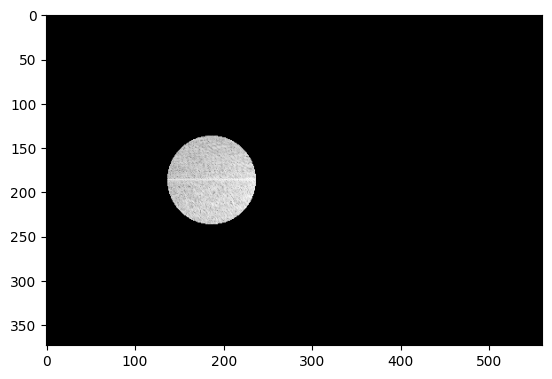

In [8]:
G_shift = F_shift * H
plot_spectrum(G_shift)

#### 2.3 - Mengembalikan gambar yang shifted ke semula dengan melakukan Inverse FFT Shift


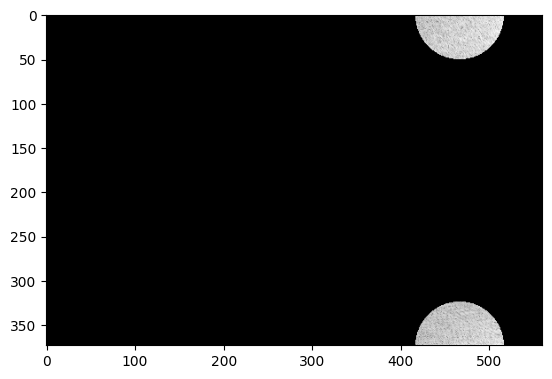

In [9]:
G = np.fft.ifftshift(G_shift)
plot_spectrum(G)

# Output : Low Frequency kembali pindah ke corner.

### Step 3 - Melakukan Inverse FFT agar gambar kembali ke Spatial Domain

(-0.5, 559.5, 372.5, -0.5)

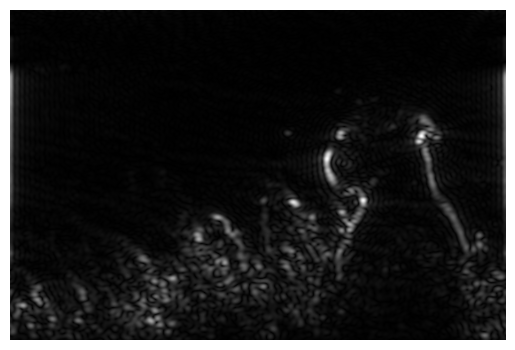

In [10]:
g = np.abs(np.fft.ifft2(G)) # Inverse FFT dengan fungsi numpy

plt.imshow(g, cmap='gray') # Tampilkan gambar dalam spatial domain setelah dilakukan filtering
plt.axis('off')


### Kesimpulan parameter $D_0$

Jika $D_0$ semakin besar maka blur akan semakin semakin kecil dan akan mendekati gambar original\

Jika $D_0$ semakin kecil maka blur akan semakin semakin besar 

Jika $D_0$ diperkecil maka low frequency akan semakin sedikit, akibatnya informasi semakin hilang (karena most informations ada di low frequency) dan gambar akan blury. Sebaliknya, jika di-pass dengan $D_0$ low frequency akan tetap banyak sehingga informasi tetap banyak dan gambar akan less-blurry.

# No. 2 - High Pass Filtering using FFT

## High Pass Filter

High Pass Filter adalah kebalikan dari Low Pass Filter. Artinya Filter $H$ pada Low Pass Filter diganti menjadi $H_{high} = 1 - H$. 

Untuk pengaplikasiannya menggunakan algoritma yang sama dengan (*)

Namun karena pada notebook ini sudah dilakukan step 1 pada low-pass filtering, maka bisa langsung lompat ke step 2 untuk apply high pass filtering

### Step 2 - Memasang Filter $H_{high}$ (High Pass) dengan mengalikan $F$ dengan $H_{high}$

#### Step 2.1 - Membentuk filter $H_{high}$

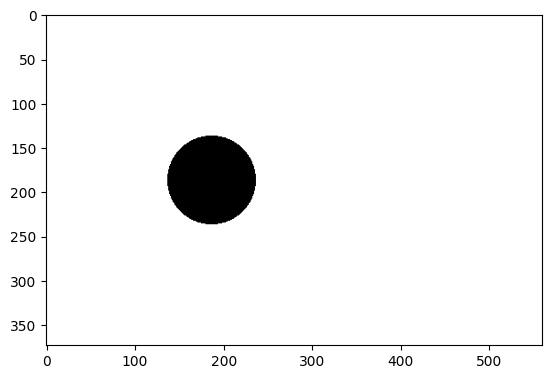

In [11]:
H_high = 1 - H
plot_spectrum(H_high)

### Step 2.2 - Mengalikan Gambar yang gambar $F$ yang sudah dilakukan shifting dengan filter $H_{high}$ 

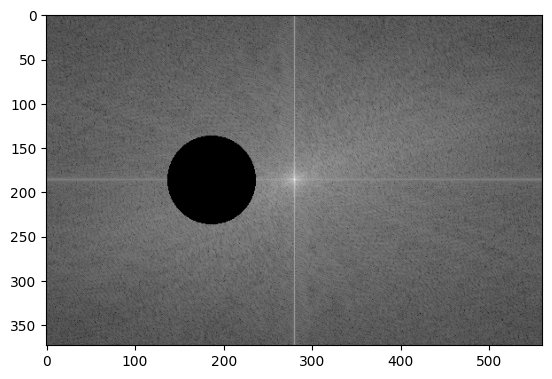

In [12]:
G_shift_high = F_shift * H_high # Apply filter dengan mengalikan F dengan filter H
plot_spectrum(G_shift_high)

#### 2.3 - Mengembalikan gambar yang shifted ke semula dengan melakukan Inverse FFT Shift


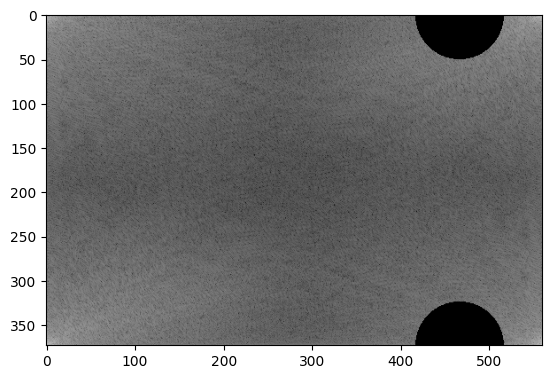

In [13]:
G_high = np.fft.ifftshift(G_shift_high) # Fungsi numpy untuk melakukan inverse FFT shift
plot_spectrum(G_high)

# Output : High Frequency kembali pindah ke corner.

### Step 3 - Melakukan Inverse FFT agar gambar kembali ke Spatial Domain

(-0.5, 559.5, 372.5, -0.5)

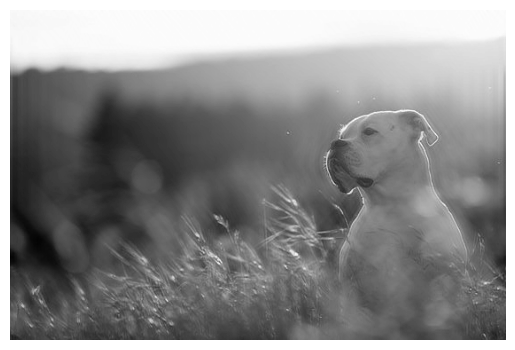

In [14]:
g_high = np.abs(np.fft.ifft2(G_high)) # Fungsi np untuk melakukan inverse FFT

plt.imshow(g_high, cmap='gray') # Tampilkan gambar dalam spatial domain setelah dilakukan filtering
plt.axis('off')


# No 3 - Butterworth Notch Filter

### Notch Reject Filter

Notch Reject Filter adalah salah satu selective filter. Notch Filter melakukan reject pada area frekuensi yang ditentukan dalam suatu pusat persegi panjang.

Dirumuskan sebagai

$$ H_{NR}(u,v) = \prod_{k = 1}^Q H_k(u,v)H_{-k}(u,v) ... (2)$$

Dengan $H_k(u,v)$ dan $H_{-k}(u,v)$ adalah high pass filter yang pusatnya berada pada $(u_k, v_k)$ dan $(-u_k, -v_k)$

Pada notebook ini sudah dilakukan step 1 pada low-pass filtering, maka bisa langsung lompat ke step 2 untuk apply Butterworth Notch Filtering


### Step 2 - Memasang Filter $H_{notch}$ (Notch Filter) dengan mengalikan $F$ dengan $H_{high}$

#### 2.1 - Membentuk Filter $H_{notch}$ (Notch Reject Filter )

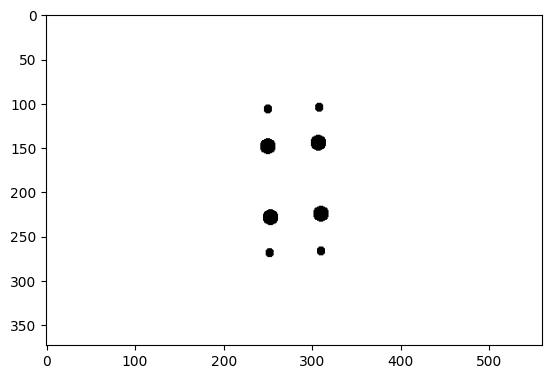

In [15]:
# Fungsi dari notch reject
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

# Membuat sekumpulan notch reject filter berbentuk segi empat
H1 = notch_reject_filter(img.shape, 9, 38, 30)
H2 = notch_reject_filter(img.shape, 9, -42, 27)
H3 = notch_reject_filter(img.shape, 5, 80, 30)
H4 = notch_reject_filter(img.shape, 5, -82, 28)

H_notch = H1 * H2 * H3 * H4 # Mengalikan semua filter sesuai dengan formula (2)
plot_spectrum(H_notch) # Plot hnotch filter

### Step 2.2 - Mengalikan Gambar yang gambar $F$ yang sudah dilakukan shifting dengan filter $H_{notch}$ 

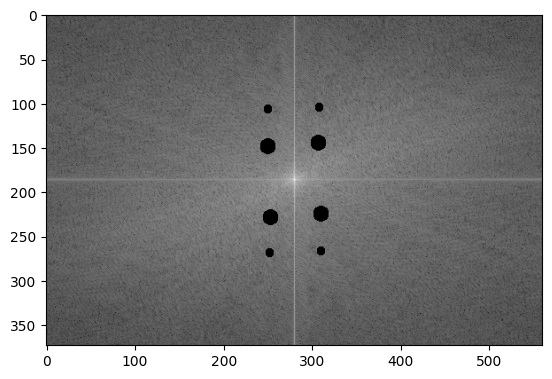

In [16]:
G_shift_notch = F_shift * H_notch # Apply Filter dengan mengalikan F dengan H
plot_spectrum(G_shift_notch)

#### 2.3 - Mengembalikan gambar yang shifted ke semula dengan melakukan Inverse FFT Shift


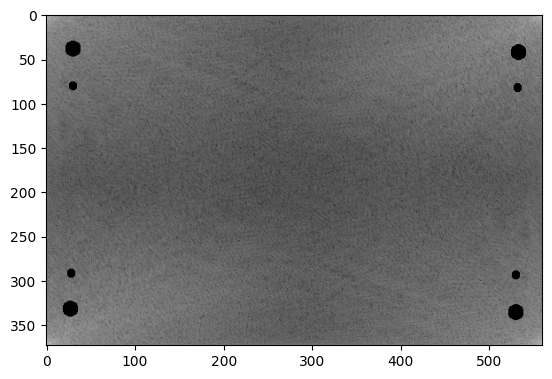

In [17]:
G_notch = np.fft.ifftshift(G_shift_notch)
plot_spectrum(G_notch)

# Output : High Frequency kembali pindah ke corner.

### Step 3 - Melakukan Inverse FFT agar gambar kembali ke Spatial Domain

(-0.5, 559.5, 372.5, -0.5)

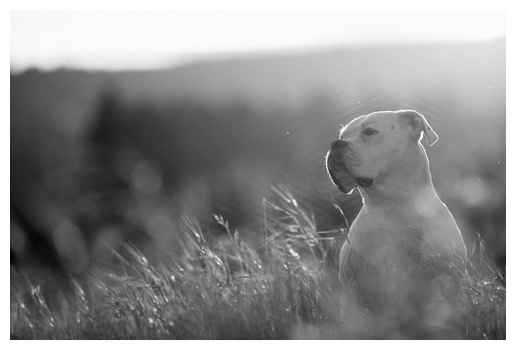

In [19]:
g_notch = np.abs(np.fft.ifft2(G_notch)) # Inverse FFT agar gambar kembali ke spatial domain

plt.imshow(g_notch, cmap='gray') # Tampilkan gambar dalam spatial domain setelah dilakukan filtering
plt.axis('off')
